## Import packages

In [83]:
from leaf.ray_tracing import ConeBeamProjector
import matplotlib.pyplot as plt
import numpy as np

plt.ion()

## Create a projection image

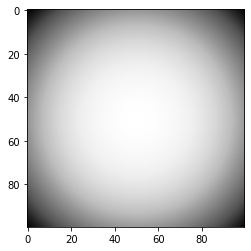

In [84]:
xx, yy = np.mgrid[:100, :100]
img = (xx - 50) ** 2 + (yy - 50) ** 2
plt.imshow(img, cmap='Greys')

## Set up the cone beam projector

In [85]:
pos = (0., 1., 0.)
lookat = (0., 0., 0.)
up = (0., 0., 1.)
cam = ConeBeamProjector(pos=pos, lookat=lookat, up=up, image=img)

## Generate projection intersection points

In [86]:
all_pts = []
colors = []
for t in np.linspace(0, 1, num=50):
    for s in np.linspace(0, 1, num=50):
        # Get the ray and the intersection distance
        origin, direction, dist, val = cam.ray(s, t)
        # Convert back into a 3D point
        pt = np.add(origin, direction * dist, dtype=np.float32)
        all_pts.append(pt)
        colors.append(val)

## Plot the intersection points

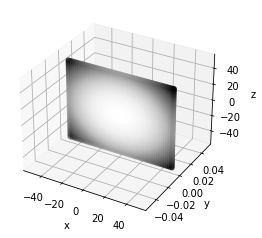

In [87]:
# split into x, y, z arrays
x, y, z = np.hsplit(np.array(all_pts), 3)

# color linearly
colors = np.array(colors)

# plot
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x, y, z, c=colors, cmap='Greys')